# Proyek Pertama: [Predictive Analytics]
- **Nama:** [Maylina Nur'aini]
- **Pendekatan Machine Learning:** [Klasifikasi]
- **Domain:** [Pendidikan (Students Performance in Exams)]

## Import Library

In [ ]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Load Dataset

In [ ]:
# Upload fie json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"maylina","key":"e9ca0dbfe70dd2a9da24aa79c607f1b9"}'}

In [ ]:
# Unduh dan load dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d spscientist/students-performance-in-exams

import zipfile
with zipfile.ZipFile("students-performance-in-exams.zip", 'r') as zip_ref:
    zip_ref.extractall("students_performance_dataset")

Dataset URL: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
License(s): unknown
students-performance-in-exams.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Load dataset ke dalam DataFrame
data = pd.read_csv("students_performance_dataset/StudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Insight:**
- Dataset "StudentsPerformance.csv" berhasil dimuat ke dalam pandas DataFrame bernama data.
- Beberapa baris pertama DataFrame ditampilkan, menunjukkan kolom-kolom: 'gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', dan 'writing score'. Kolom-kolom ini merepresentasikan berbagai faktor yang berkaitan dengan performa siswa.

## Eksplorasi Data

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   int64
 1   race/ethnicity               1000 non-null   int64
 2   parental level of education  1000 non-null   int64
 3   lunch                        1000 non-null   int64
 4   test preparation course      1000 non-null   int64
 5   math score                   1000 non-null   int64
 6   reading score                1000 non-null   int64
 7   writing score                1000 non-null   int64
 8   pass_math                    1000 non-null   int64
dtypes: int64(9)
memory usage: 70.4 KB
None


In [ ]:
print(data.describe())

            gender  race/ethnicity  parental level of education        lunch  \
count  1000.000000     1000.000000                  1000.000000  1000.000000   
mean      0.482000        1.843000                     2.689000     0.645000   
std       0.499926        1.370485                     1.686156     0.478753   
min       0.000000        0.000000                     0.000000     0.000000   
25%       0.000000        1.000000                     1.000000     0.000000   
50%       0.000000        1.000000                     3.000000     1.000000   
75%       1.000000        3.000000                     4.000000     1.000000   
max       1.000000        4.000000                     5.000000     1.000000   

       test preparation course  math score  reading score  writing score  \
count              1000.000000  1000.00000    1000.000000    1000.000000   
mean                  0.642000    66.08900      69.169000      68.054000   
std                   0.479652    15.16308      14.

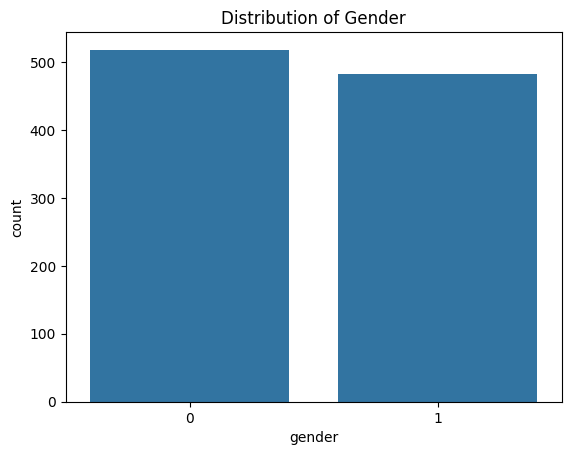

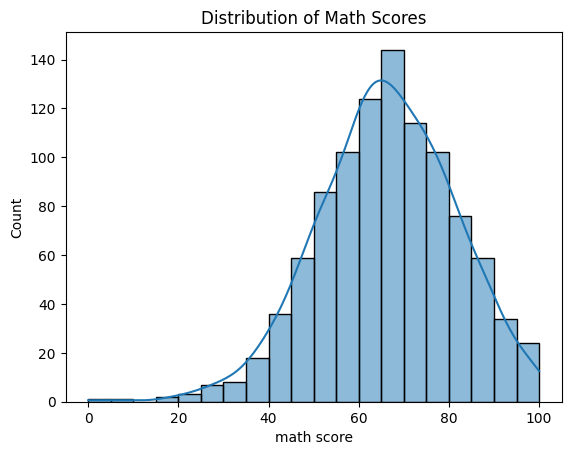

In [ ]:
sns.countplot(x='gender', data=data)
plt.title('Distribution of Gender')
plt.show()

sns.histplot(data['math score'], bins=20, kde=True)
plt.title('Distribution of Math Scores')
plt.show()

**Insight:**

- Informasi dataset menunjukkan bahwa terdapat 1000 entri dengan 8 kolom. Semua kolom memiliki tipe data yang sesuai dan tidak ada nilai null yang terdeteksi pada tahap ini.
- Ringkasan statistik deskriptif menunjukkan distribusi nilai untuk kolom numerik ('math score', 'reading score', 'writing score'), termasuk nilai rata-rata, standar deviasi, minimum, maksimum, dan kuartil.
- Visualisasi menunjukkan distribusi gender dalam dataset dan distribusi nilai matematika siswa, memberikan gambaran awal tentang sebaran data pada fitur-fitur tersebut.

## Pra-pemrosesan

In [ ]:
# Cek missing value
print(data.isnull().sum())

# Buat label klasifikasi: apakah nilai matematika >= 70 (1 = lulus, 0 = tidak)
data['pass_math'] = np.where(data['math score'] >= 70, 1, 0)

# Encode fitur kategori
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['lunch'] = le.fit_transform(data['lunch'])
data['test preparation course'] = le.fit_transform(data['test preparation course'])
data['race/ethnicity'] = pd.factorize(data['race/ethnicity'])[0]
data['parental level of education'] = pd.factorize(data['parental level of education'])[0]

data.head()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
pass_math                      0
dtype: int64


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_math
0,0,0,0,1,1,72,72,74,1
1,0,1,1,1,0,69,90,88,0
2,0,0,2,1,1,90,95,93,1
3,1,2,3,0,1,47,57,44,0
4,1,1,1,1,1,76,78,75,1


**Insight:**

- Tidak ada missing value yang ditemukan dalam dataset.
- Label klasifikasi baru 'pass_math' berhasil dibuat berdasarkan kondisi nilai 'math score' >= 70.
- Fitur kategorikal seperti 'gender', 'lunch', 'test preparation course', 'race/ethnicity', dan 'parental level of education' telah berhasil di-encode menjadi nilai numerik menggunakan *LabelEncoder* dan *pd.factorize*, yang siap untuk digunakan dalam model machine learning.

## Split Data Train & Test

In [ ]:
X = data.drop(columns=['math score', 'pass_math'])
y = data['pass_math']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Insight:**

- Data telah berhasil dibagi menjadi fitur (variabel independen) dan label (variabel dependen, yaitu 'pass_math').
- Dataset kemudian dibagi lagi menjadi data latih (untuk melatih model) dan data uji (untuk mengevaluasi model) dengan rasio 80:20, memastikan bahwa model akan diuji pada data yang belum pernah dilihat sebelumnya. Pembagian ini menggunakan random_state=42 untuk memastikan konsistensi hasil pembagian.

## Training Model

In [ ]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

**Insight:**

- Dua model klasifikasi telah berhasil dilatih pada data latih (X_train dan y_train): Logistic Regression dan Random Forest.
- Model Logistic Regression menggunakan parameter *max_iter=1000* untuk memastikan konvergensi.
- Model Random Forest menggunakan *random_state=42* untuk reproducibility.
Prediksi telah dibuat pada data uji (X_test) untuk kedua model, yaitu *y_pred_lr dan y_pred_rf*, yang siap dievaluasi.

## Evaluasi Model

In [ ]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("Confusion Matrix Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))

print("Classification Report Random Forest:")
print(classification_report(y_test, y_pred_rf))

Logistic Regression Accuracy: 0.9
Random Forest Accuracy: 0.86
Confusion Matrix Random Forest:
[[108  14]
 [ 14  64]]
Classification Report Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       122
           1       0.82      0.82      0.82        78

    accuracy                           0.86       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.86      0.86      0.86       200



**Insight:**
- Hasil evaluasi menunjukkan bahwa model Logistic Regression memiliki akurasi 0.9, sedikit lebih tinggi dibandingkan dengan model Random Forest yang memiliki akurasi 0.86.
- Confusion Matrix untuk Random Forest menunjukkan bahwa model ini dengan benar mengklasifikasikan 108 siswa sebagai tidak lulus (True Negatives) dan 64 siswa sebagai lulus (True Positives). Terdapat 14 siswa yang seharusnya tidak lulus namun diprediksi lulus (False Positives) dan 14 siswa yang seharusnya lulus namun diprediksi tidak lulus (False Negatives).
- Classification Report untuk Random Forest memberikan detail lebih lanjut. Untuk kelas 0 (tidak lulus), presisi, recall, dan f1-score adalah 0.89. Untuk kelas 1 (lulus), presisi, recall, dan f1-score adalah 0.82. Ini menunjukkan bahwa model sedikit lebih baik dalam memprediksi siswa yang tidak lulus dibandingkan dengan siswa yang lulus.